In [1]:
import pandas as pd
import numpy as np
import matplotlib   as plt
import seaborn as sns
from datetime import datetime



In [ ]:
#load the dataset and perform initial inspection
df=pd.read_csv('forex_predictions_data.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Predicted_Close,Currency_Pair,Signal,Confidence
0,2024-01-01,1.18727,1.92461,0.85312,1.18154,2201,1.22984,EUR/USD,Hold,0.90
1,2024-01-02,1.47536,1.82881,0.54067,1.32296,error,1.03797,EUR/USD,Sell,NaN
2,2024-01-03,1.36600,1.78415,0.54242,1.28539,4420,1.03888,EUR/USD,Sell,NaN
3,2024-01-04,1.29933,1.54684,0.99332,1.17805,4079,1.00117,EUR/USD,Sell,0.64
4,2024-01-05,1.07801,1.68386,0.68714,NaN,1832,1.48385,EUR/USD,Sell,0.68


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             226 non-null    object 
 1   Open             224 non-null    float64
 2   High             220 non-null    float64
 3   Low              225 non-null    float64
 4   Close            212 non-null    float64
 5   Volume           226 non-null    object 
 6   Predicted_Close  222 non-null    float64
 7   Currency_Pair    229 non-null    object 
 8   Signal           227 non-null    object 
 9   Confidence       218 non-null    float64
dtypes: float64(6), object(4)
memory usage: 18.0+ KB


In [8]:

df.describe()

,Open,High,Low,Close,Predicted_Close,Confidence
count,224.000000,220.000000,225.000000,212.000000,222.000000,218.000000
mean,1.239946,1.753113,0.750030,1.245072,1.250415,0.756468
std,0.148956,0.147816,0.150434,0.140594,0.156102,0.135125
min,1.002530,1.505420,0.505680,1.002320,1.000120,0.500000
25%,1.111860,1.638832,0.614320,1.122535,1.115280,0.652500
50%,1.248105,1.763400,0.746310,1.235910,1.259605,0.760000
75%,1.365100,1.877682,0.877570,1.368805,1.392158,0.870000
max,1.493440,1.995250,0.999860,1.498440,1.499680,1.000000


In [10]:
df.shape

(229, 10)

In [12]:
df.dtypes

Date                object
Open               float64
High               float64
Low                float64
Close              float64
Volume              object
Predicted_Close    float64
Currency_Pair       object
Signal              object
Confidence         float64
dtype: object

In [ ]:
#handling bad data
print("Number of missing values in each column:")
df=pd.read_csv('forex_predictions_data.csv')
df.isnull().sum()

Date                3
Open                5
High                9
Low                 4
Close              17
Volume              3
Predicted_Close     7
Currency_Pair       0
Signal              2
Confidence         11
dtype: int64

In [25]:
df= pd.read_csv('forex_predictions_data.csv')
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Predicted_Close', 'Confidence']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce') #Convert to numeric, coercing errors to NaN
        # fill NaN values with the mean of the column
        df[col] = df[col].fillna(df[col].median())
        
# For categorical columns, we can fill missing values with the mode
categorical_cols = ['Signal']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])  # fill NaN values with the mode of the column
# Check again for missing values
print("Missing values after handling:")
print(df.isnull().sum())

Missing values after handling:
Date               3
Open               0
High               0
Low                0
Close              0
Volume             0
Predicted_Close    0
Currency_Pair      0
Signal             0
Confidence         0
dtype: int64


In [2]:
import pandas as pd
df=pd.read_csv('forex_predictions_data.csv')
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 10


In [3]:
# Remove duplicates
df = df.drop_duplicates()
print("Number of rows after removing duplicates:", df.shape[0])
# Check for duplicates dates
print("Number of duplicate dates:", df['Date'].duplicated().sum())
# Remove duplicate dates
df = df.drop_duplicates(subset=['Date'], keep='first')

# Shape
df.shape

Number of rows after removing duplicates: 219
Number of duplicate dates: 2


(217, 10)

In [4]:
# Final clean dataset
df.info()
# Check empty values again
print("Missing values after all cleaning:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 217 entries, 0 to 218
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             216 non-null    object 
 1   Open             212 non-null    float64
 2   High             208 non-null    float64
 3   Low              214 non-null    float64
 4   Close            203 non-null    float64
 5   Volume           214 non-null    object 
 6   Predicted_Close  211 non-null    float64
 7   Currency_Pair    217 non-null    object 
 8   Signal           215 non-null    object 
 9   Confidence       206 non-null    float64
dtypes: float64(6), object(4)
memory usage: 18.6+ KB
Missing values after all cleaning:
Date                1
Open                5
High                9
Low                 3
Close              14
Volume              3
Predicted_Close     6
Currency_Pair       0
Signal              2
Confidence         11
dtype: int64


In [6]:
print(df[['Open', 'High', 'Low', 'Close', 'Volume', 'Predicted_Close', 'Confidence']].dtypes)


Open               float64
High               float64
Low                float64
Close              float64
Volume              object
Predicted_Close    float64
Confidence         float64
dtype: object


In [7]:
cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Predicted_Close', 'Confidence']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')


In [8]:
df_clean = df[cols].dropna()
corr_matrix = df_clean.corr()


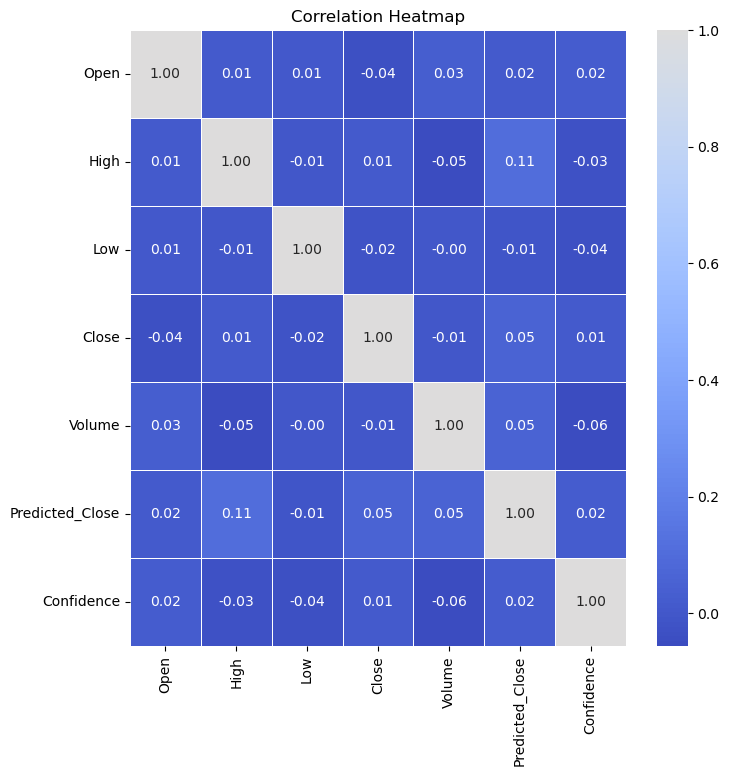

In [13]:
# Analysis
# Correlation Analysis
# calculate correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = df[['Open', 'High', 'Low', 'Close', 'Volume', 'Predicted_Close', 'Confidence']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, center=True)
plt.title('Correlation Heatmap')
plt.show()

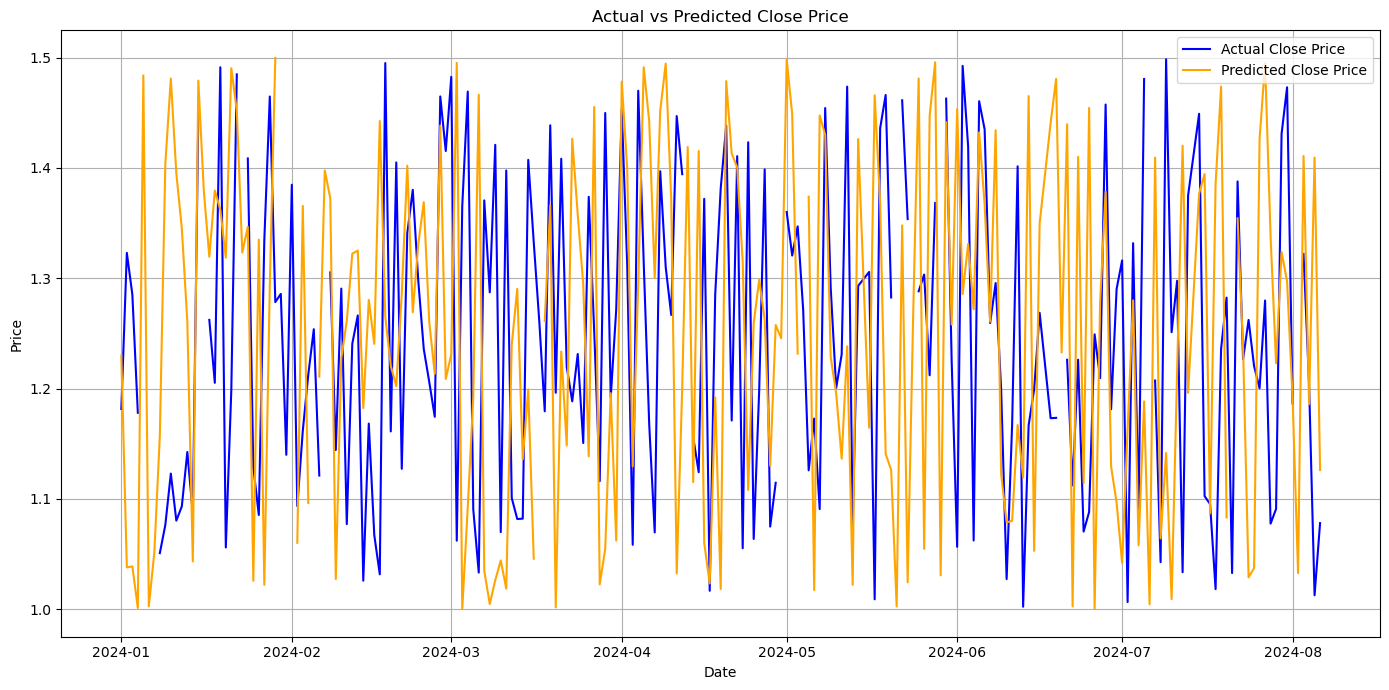

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.dropna(subset=['Date'], inplace=True)

# Plot actual vs predicted
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Actual Close Price', color='blue')
plt.plot(df['Date'], df['Predicted_Close'], label='Predicted Close Price', color='orange')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Text(0.5, 0, 'Signal Type')

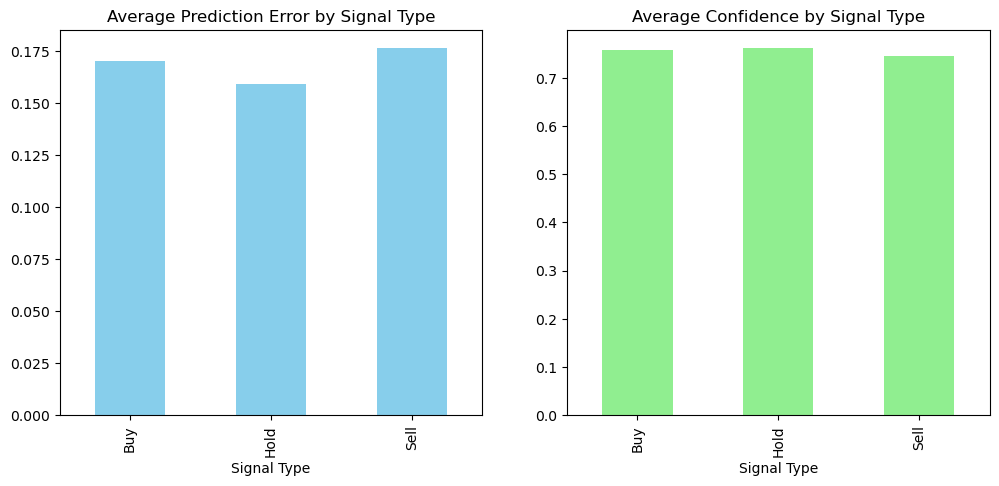

In [18]:
# Signal Performance Analysis
df['Prediction_Error'] = abs(df['Close'] - df['Predicted_Close'])

# Analyze error by signal type
signal_error = df.groupby('Signal')['Prediction_Error'].mean()
signal_confidence = df.groupby('Signal')['Confidence'].mean()
# Plotting the average prediction error by signal type
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
signal_error.plot(kind='bar', color='skyblue')
plt.title('Average Prediction Error by Signal Type')
plt.xlabel('Signal Type')

# Plotting the average confidence by signal type
plt.subplot(1, 2, 2)
signal_confidence.plot(kind='bar', color='lightgreen')
plt.title('Average Confidence by Signal Type')
plt.xlabel('Signal Type')

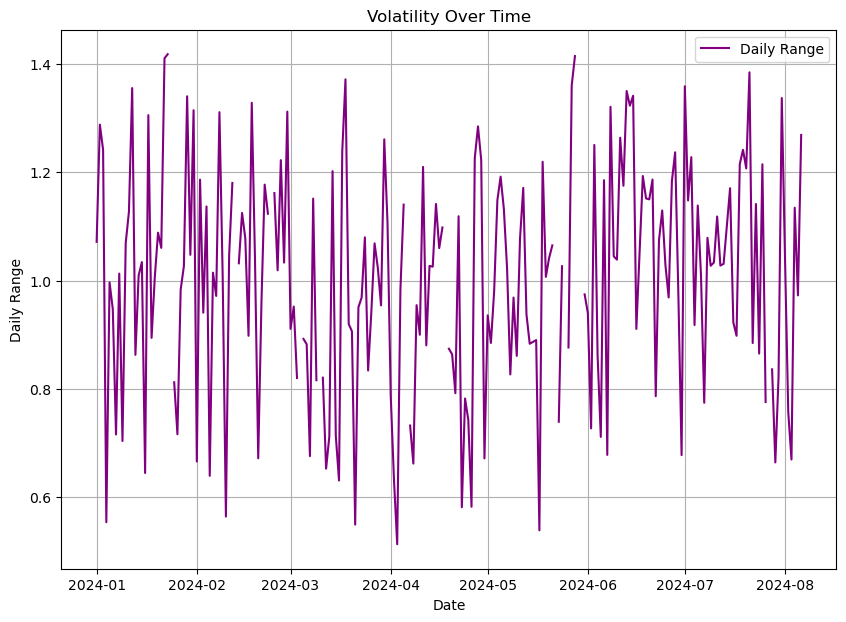

In [20]:
# Volitility Analysis
# Calculate daily returns
df['Daily_Range'] = df['High']-df['Low']
# Plot volatility over time
plt.figure(figsize=(10, 7))
plt.plot(df['Date'], df['Daily_Range'], label='Daily Range', color='purple')
plt.xlabel('Date')
plt.ylabel('Daily Range')
plt.title('Volatility Over Time')
plt.legend()
plt.grid()
plt.show()